# Install and using dtale

[dtale](https://github.com/man-group/dtale) is "visualizer for pandas data structures" that can be used in Jupyter notebooks. It's fancy!

## Installing dtale

Installing dtale just requires a `pip install`:

```bash
pip install dtale
```

It takes a while to install, but that's it!

## How to display and sort with dtale

Using qgrid to display and sort your data makes life easy. All you need to do is run `qgrid.show_grid` and feed it your dataframe.

In this case we're using `precision=2` to round life expectancy to two decimal places.

In [ ]:
import pandas as pd
import dtale

df = pd.read_csv("countries.csv")
dtale.show(df)

You can't see the interactive version on the web, so here's a screenshot.

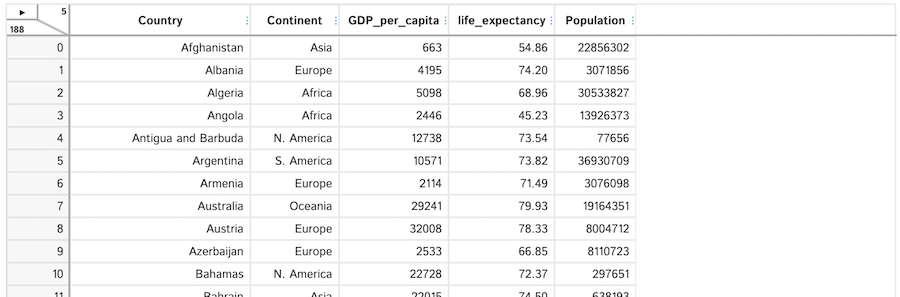

## How to edit with dtale

dtale is also a great took for making manual edits! The edits are saved and can be used later.

First, we'll **start with a pandas dataframe.** This one is a few science fiction authors.

In [5]:
import pandas as pd

df = pd.DataFrame([
    { 'name': 'Philip K. Dick', 'book': 'Do Androids Dream of Electric Sheep?' },
    { 'name': 'Ursula K. Le Guin', 'book': 'The Left Hand of Darkness' },
    { 'name': 'Stanisław Lem', 'book': 'Solaris' }
])

df.head()

name                                  book
0     Philip K. Dick  Do Androids Dream of Electric Sheep?
1  Ursula K. Le Guin             The Left Hand of Darkness
2      Stanisław Lem                               Solaris

While Stanisław Lem is great, not everyone knows how to type an ł – we'll use dtale to change his first name from **Stanisław** to **Stanislaw**.

Unlike when we're just sorting and filtering, this time we're saving our spreadsheet as a variable named `d`.

In [ ]:
import dtale

d = dtale.show(df)
d

(Pretend that you're watching me edit this the ł to an l in Stanisław's name)
 
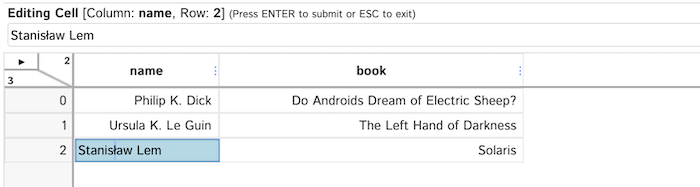

**Edits made in dtale do not edit your original dataframe.** In order to get the edited dataframe, you ask dtale for the changed df with `d.data`.

> We use `.copy()` to make sure that future edits don't affect our dataframe.

In [12]:
edited_df = d.data.copy()
edited_df

name                                  book
0     Philip K. Dick  Do Androids Dream of Electric Sheep?
1  Ursula K. Le Guin             The Left Hand of Darkness
2      Stanislaw Lem                               Solaris

## Comparing df before and after edits

It's probably important to know **what was edited**. While unfortunately dtale doesn't give us a nice JSON diff or anything, we have a couple simple options to see what edits were made.

### Compare each row with `df.merge`

In this situation, we use `indicator=True` to mark whether the row is found in the original or edited version of the data. You're probably interested in `left_only` and `right_only`.

In [13]:
df.merge(edited_df, indicator=True, how='outer')

name                                  book      _merge
0     Philip K. Dick  Do Androids Dream of Electric Sheep?        both
1  Ursula K. Le Guin             The Left Hand of Darkness        both
2      Stanisław Lem                               Solaris   left_only
3      Stanislaw Lem                               Solaris  right_only

### Only show the changes

You can also use [df.compare](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.compare.html) to just illustrate the changes between the two.

In [14]:
edits = df.compare(edited_df)
edits

name               
            self          other
2  Stanisław Lem  Stanislaw Lem

## Shutting down dtale

dtale is a magic little service running in the background. To shut it down you use `d.kill()`